Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
number_of_points = 1000
x_point = []
y_point = []

In [ ]:
a = 0.22
b = 0.78

In [ ]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = (a*x+b)+np.random.normal(0.0,0.1)
    x_point.append(x)
    y_point.append(y)

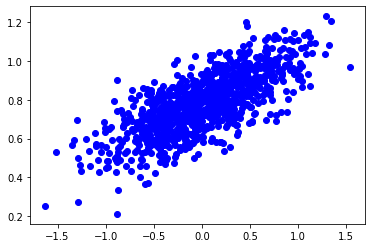

In [ ]:
plt.scatter(x_point,y_point,c='b')
plt.show()

In [ ]:
real_x = np.array(x_point)
real_y = np.array(y_point)

**batch Stochastic Gradient Descent** - wykorzystujemy **cały zbiór danych**

Definicja błędu:

In [ ]:
def loss_fn(real_y, pred_y):
    return tf.reduce_mean((real_y - pred_y)**2)

In [ ]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [ ]:
Loss = []
grad_a_list = []
grad_b_list = []
epochs = 50
learning_rate = 0.6

for _ in range(epochs):
  with tf.GradientTape() as tape:
    pred_y = a * real_x + b
    loss = loss_fn(real_y, pred_y)
    Loss.append(loss.numpy())

  grad_a, grad_b = tape.gradient(loss,(a, b))
  
  grad_a_list.append(grad_a.numpy())
  grad_b_list.append(grad_b.numpy())

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)

In [ ]:
np.max(Loss),np.min(Loss)

(0.27569404, 0.0106868595)

In [ ]:
print(a.numpy())
print(b.numpy())

0.22263427
0.7760439


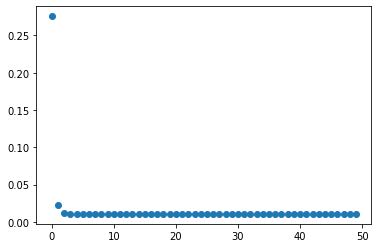

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [ ]:
max = np.max(x_point)
min = np.min(x_point)

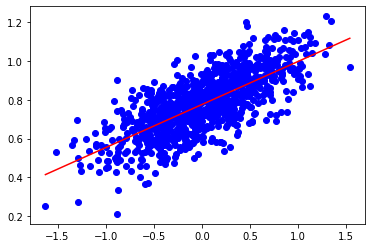

In [ ]:
X = np.linspace(min, max, num=10)
plt.plot(X,a.numpy()*X+b.numpy(),c='r')
plt.scatter(x_point,y_point,c="b")
plt.show()

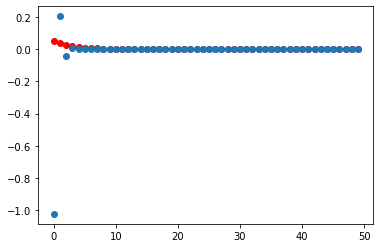

In [ ]:
plt.scatter(np.arange(epochs),grad_a_list,c="r")
plt.scatter(np.arange(epochs),grad_b_list)
plt.show()

**Mini-batch Stochastic Gradient Descent** - wykorzystujemy **część zbióru danych**

In [ ]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())

In [ ]:
def subset_dataset(x_dataset, y_dataset, subset_size):
    arr = np.arange(len(x_dataset)) 
    np.random.shuffle(arr) 
    x_train = [x_dataset[i] for i in arr[0:subset_size]]
    y_train = [y_dataset[i] for i in arr[0:subset_size]]
    return x_train,y_train

In [ ]:
Loss = []
epochs = 50
learning_rate = 0.2
batch_size = 1

for i in range(epochs):

  real_x_batch,real_y_batch = subset_dataset(real_x, real_y, batch_size)

  with tf.GradientTape() as tape:
    pred_y = a * real_x_batch + b
    loss = loss_fn(real_y_batch, pred_y)
    Loss.append(loss.numpy())
    
    grad_a, grad_b = tape.gradient(loss,(a, b))

  a.assign_sub(learning_rate*grad_a)
  b.assign_sub(learning_rate*grad_b)  

In [ ]:
np.max(Loss),np.min(Loss)

(0.11951862, 5.3063e-06)

In [ ]:
print(a.numpy())
print(b.numpy())

0.17872274
0.76846695


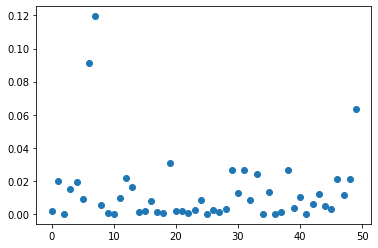

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

A teraz bardziej formalnie:

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Definiujemy model:

In [ ]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [ ]:
model.add(Dense(units = 1, use_bias=True, input_dim=1, activation = "linear"))

Definiujemy **optymalizator** i **błąd** (średni błąd kwadratowy - MSE). **Współczynnik uczenia = 0.1**

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.1)

In [ ]:
model.compile(loss='MSE',optimizer=opt)

Informacja o modelu:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Proces **uczenia**:

In [ ]:
epochs = 50
h = model.fit(real_x,real_y, verbose=0, epochs=epochs, batch_size=1000)

In [ ]:
Loss = h.history['loss']

Sprawdźmy jakie są **wartości wag**:

In [ ]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[0.23555873]]
[0.8206232]


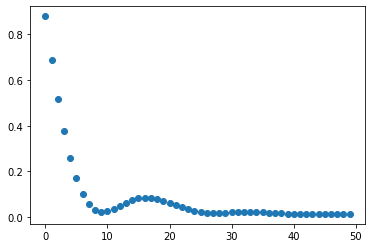

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()